[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


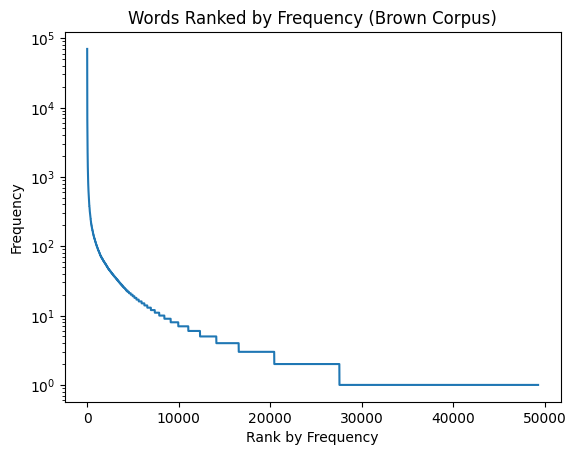

Text(0, 0.5, 'Frequency')

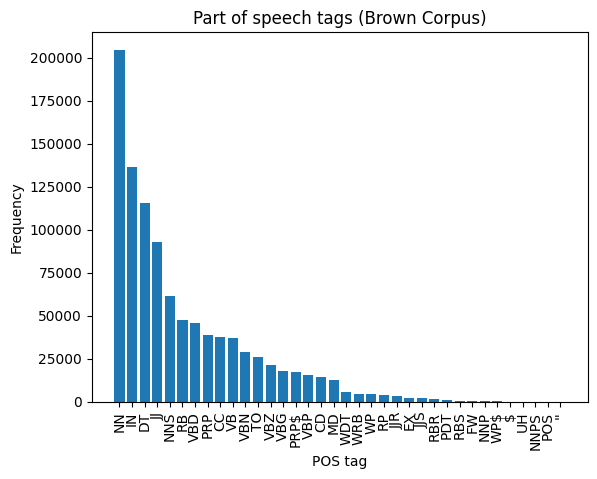

In [ ]:
#Pt1
from nltk.corpus import brown
from nltk.corpus import stopwords
import nltk.stem.wordnet
import nltk
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import re#eeeee
import pandas as pd

nltk.download("brown")
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')


def clean_brown_sents():
  b = brown.sents()
  st = []
  for s in b:
    tmp = []
    for w in s:
      if len(re.sub('[^a-z0-9]+','',w)):
        tmp += [w.lower().replace(".","")]
    st += [tmp]
  return st

blah = clean_brown_sents()
stops = set(stopwords.words("english"))
brown_ = nltk.pos_tag_sents(blah)

freq = {}
pos_freq = {}
for s in brown_:
  for w in s:
    freq[w[0]]=freq.get(w[0],0)+1
    pos_freq[w[1]]=pos_freq.get(w[1],0)+1

def make_csv(db,c1,c2,fn):

  col1 = list(map(lambda a:a[0],db))
  col2 = list(map(lambda a:a[1],db))
  df = pd.DataFrame({c1:col1,c2:col2})
  df.to_csv("%s.csv"%fn)

make_csv( sorted(freq.items(),key=lambda a:a[1],reverse=True),"Word","Frequency","WordFrequencyBrown")
make_csv(sorted(pos_freq.items(),key=lambda a:a[1],reverse=True),"POS Tag","Frequency","POSFrequencyBrown")


plt.yscale("log")
plt.plot(sorted(list(map(lambda a:a[1],freq.items())),reverse=True))
plt.xlabel("Rank by Frequency")
plt.ylabel("Frequency")
plt.title("Words Ranked by Frequency (Brown Corpus)")
plt.show()
plt.clf()
tmp = sorted(pos_freq.items(),key=lambda a:a[1],reverse=True)
plt.xticks(rotation=90)
plt.bar(list(map(lambda a:a[0],tmp)),list(map(lambda a:a[1],tmp)))
plt.title("Part of speech tags (Brown Corpus)")
plt.xlabel("POS tag")
plt.ylabel("Frequency")

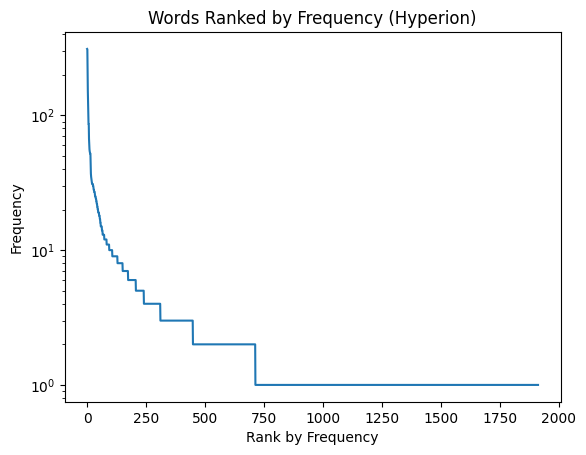

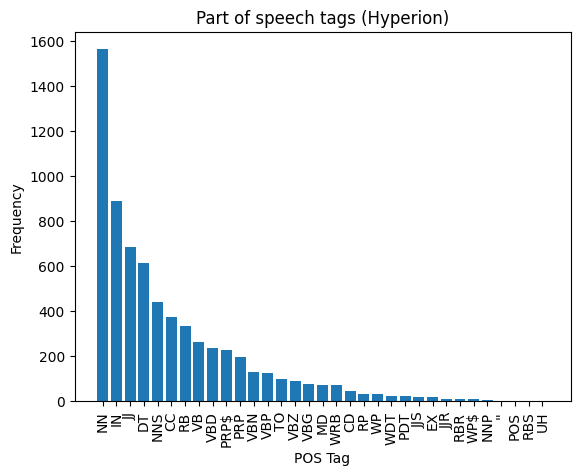

In [ ]:
#Pt2
import requests
poem = str(requests.get("https://gitlab.com/jcoles/nlp-final-project/-/raw/main/poem.txt").content,"UTF-8")

poem_lines = []
for l in poem.split("\n"):
  poem_lines += [re.sub("(—|\.|,|\?|;|!|:)"," ",l).lower().split()]

freq_poem = {}
pos_freq_poem = {}

lemmatizer = WordNetLemmatizer()
for l in poem_lines:
  lm = list(map(lambda a:lemmatizer.lemmatize(a),l))
  w_ = nltk.pos_tag(l)
  for w in lm:
    freq_poem[w]=freq_poem.get(w,0)+1
  for w in w_:
    pos_freq_poem[w[1]]=pos_freq_poem.get(w[1],0)+1

plt.yscale("log")
plt.plot(sorted(list(map(lambda a:a[1],freq_poem.items())),reverse=True))
plt.xlabel("Rank by Frequency")
plt.ylabel("Frequency")
plt.title("Words Ranked by Frequency (Hyperion)")
plt.show()
plt.clf()
tmp = sorted(pos_freq_poem.items(),key=lambda a:a[1],reverse=True)
plt.xticks(rotation=90)
plt.bar(list(map(lambda a:a[0],tmp)),list(map(lambda a:a[1],tmp)))
plt.title("Part of speech tags (Hyperion)")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
make_csv( sorted(freq_poem.items(),key=lambda a:a[1],reverse=True),"Word","Frequency","WordFrequencyPoem")
make_csv(sorted(pos_freq_poem.items(),key=lambda a:a[1],reverse=True),"POS Tag","Frequency","POSFrequencyPoem")



Text(0, 0.5, 'Proportion of Bucket in Common')

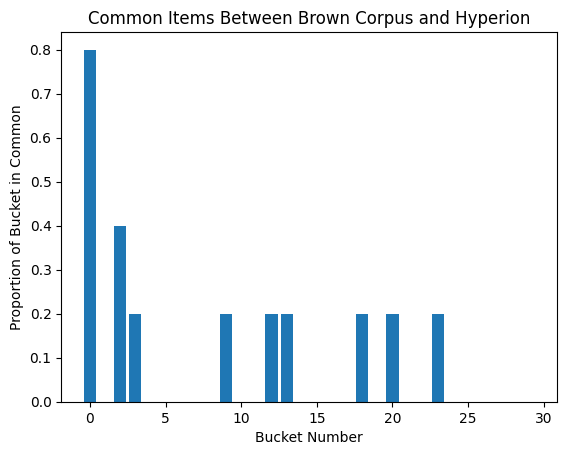

In [ ]:
#Pt3
nw_brown = sum(list(map(lambda a:a[1],freq.items())))
normalized_freq_brown = {k:freq[k]/nw_brown for k in freq.keys()}
nw_poem = sum(list(map(lambda a:a[1],freq_poem.items())))
normalized_freq_poem = {k:freq_poem[k]/nw_poem for k in freq_poem.keys()}

br_sorted = sorted(normalized_freq_brown.items(),key=lambda a:a[1],reverse=True)
p_sorted = sorted(normalized_freq_poem.items(),key=lambda a:a[1],reverse=True)

why = []
for i in range(30):
  br_slice = br_sorted[i*5:(i+1)*5]
  p_slice = p_sorted[i*5:(i+1)*5]
  why += [len(set(list(map(lambda a:a[0],br_slice))).intersection(set(list(map(lambda a:a[0],p_slice)))))/5]

plt.bar(range(30), why)
plt.title("Common Items Between Brown Corpus and Hyperion")
plt.xlabel("Bucket Number")
plt.ylabel("Proportion of Bucket in Common")

<BarContainer object of 12 artists>

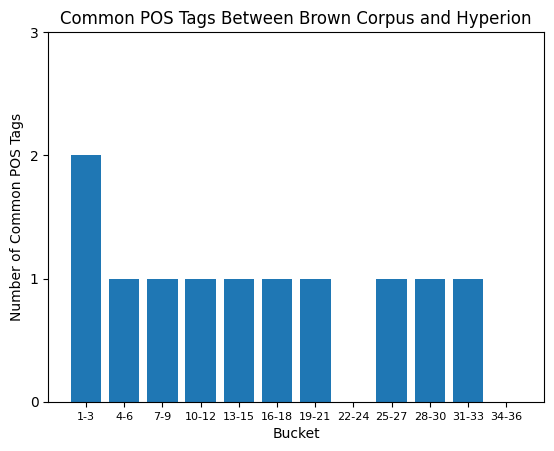

In [ ]:
#Pt4
p1 = sorted(pos_freq_poem.items(),key=lambda a:a[1],reverse=True)
p2 = sorted(pos_freq.items(),key=lambda a:a[1],reverse=True)


raw_data_inter = []
for i in range(max(len(p1),len(p2))//3):
  if i > min(len(p1),len(p2)):
    print(0)
    break
  p1_slice = set(map(lambda a:a[0],p1[i*3:(i+1)*3]))
  p2_slice = set(map(lambda a:a[0],p2[i*3:(i+1)*3]))

  raw_data_inter += [len(p1_slice.intersection(p2_slice))]

lbls = ["%d-%d"%(i*3+1,(i+1)*3) for i in range(len(raw_data_inter))]

plt.yticks(range(0,4))
plt.xticks(fontsize=8)
plt.ylim(0,3)
plt.xlabel("Bucket")
plt.ylabel("Number of Common POS Tags")
plt.title("Common POS Tags Between Brown Corpus and Hyperion")
plt.bar(lbls,raw_data_inter)


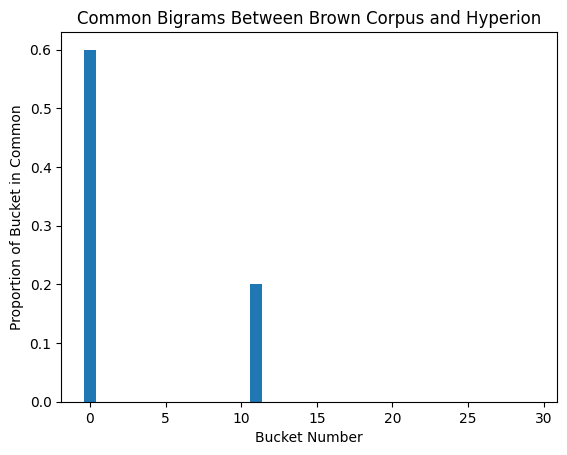

In [ ]:
#Pt5
brown_bi_freq = {}
poem_bi_freq = {}

for l in poem_lines:
  for b in nltk.bigrams(l):
    poem_bi_freq[b] = poem_bi_freq.get(b,0)+1
for l in blah:
  for b in nltk.bigrams(l):
      brown_bi_freq[b] = brown_bi_freq.get(b,0)+1

sorted_brown_bi_freq = sorted(brown_bi_freq.items(),key=lambda a:a[1],reverse=True)
sorted_poem_bi_freq = sorted(poem_bi_freq.items(),key=lambda a:a[1],reverse=True)

why = []
for i in range(30):
  br_slice = sorted_brown_bi_freq[i*5:(i+1)*5]
  p_slice = sorted_poem_bi_freq[i*5:(i+1)*5]
  why += [len(set(list(map(lambda a:a[0],br_slice))).intersection(set(list(map(lambda a:a[0],p_slice)))))/5]

plt.bar(range(30), why)
plt.xlabel("Bucket Number")
plt.ylabel("Proportion of Bucket in Common")
plt.title("Common Bigrams Between Brown Corpus and Hyperion")

make_csv(sorted_brown_bi_freq,"Bigram","Frequency","BigramFrequencyBrown")
make_csv(sorted_poem_bi_freq,"Bigram","Frequency","BigramFrequencyPoem")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


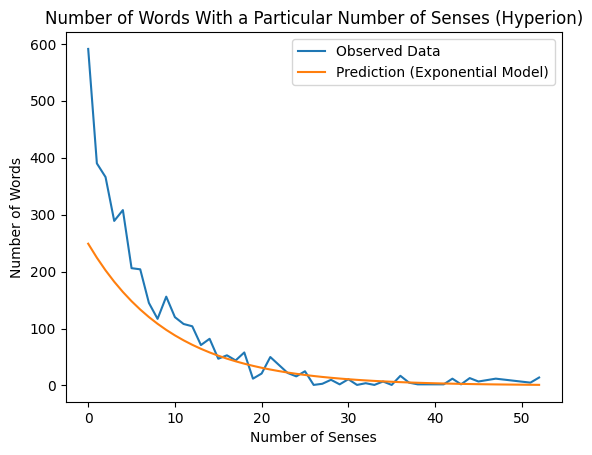

In [ ]:
#Pt 6-7
from nltk.corpus import wordnet as wn
import nltk
from nltk.corpus import wordnet_ic
from math import log
from sklearn.linear_model import LinearRegression
import numpy as np
nltk.download('wordnet')

sense_freq = {}
sense_counts = []
sense_by_word = {}
for l in poem_lines:
  sense_count = 0
  l_ = list(filter(lambda a:a not in stops,l))
  s = ""
  for w in l_:
    w__ = lemmatizer.lemmatize(w)
    q = len(wn.synsets(w__))
    sense_count += q
    sense_freq[q] = sense_freq.get(q,0)+1
    sense_by_word[w__] = q
    s += "(%s,%d)"%(w__,q)
  sense_counts += [sense_count/len(l_) if len(l_) else 0.0]

make_csv(list(enumerate(sense_counts)),"Line#","Average Sense","AverageSensePerLine")
make_csv(sorted(sense_by_word.items(),key=lambda a:a[1],reverse=True),"Word","Number of Senses","SensesByWord")

foo = sorted(sense_freq.items(),key=lambda a:a[0])
log_data = list(map(lambda a:log(a[1]),foo))
X = np.array(list(map(lambda a:a[0],foo))).reshape(-1,1)
reg = LinearRegression().fit(X, log_data)

fit_line_data = []
for x in X:
  fit_line_data += [np.exp(reg.predict(np.array([x])))]

plt.plot(list(map(lambda a:a[0],foo)),list(map(lambda a:a[1],foo)),label="Observed Data")
plt.plot(list(map(lambda a:a[0],foo)),fit_line_data,label="Prediction (Exponential Model)")
plt.xlabel("Number of Senses")
plt.ylabel("Number of Words")
plt.title("Number of Words With a Particular Number of Senses (Hyperion)")
plt.legend()

# New Section

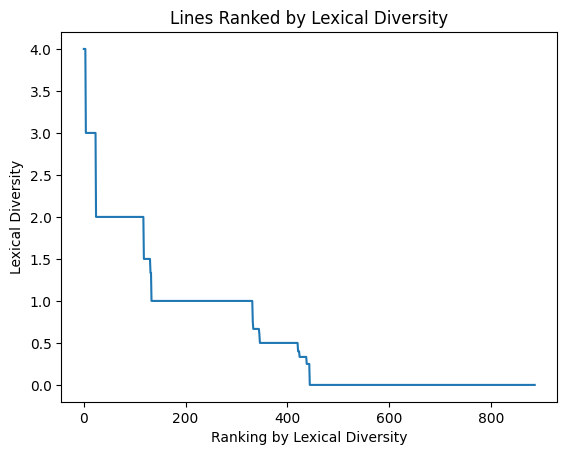

In [ ]:
#Pt 8
raw_ratios = []
for l in poem_lines:
  f = nltk.pos_tag(l,tagset="universal")
  vc = 0
  aac = 0
  for w in f:
    if w[1]=="VERB":
      vc+= 1
    if w[1]=="ADJ" or w[1]=="ADV":
      aac += 1
  raw_ratios += [aac/vc if vc else 0.0]
s = sorted(raw_ratios,reverse=True)
plt.plot(s)
plt.title("Lines Ranked by Lexical Diversity")
plt.xlabel("Ranking by Lexical Diversity")
plt.ylabel("Lexical Diversity")
make_csv(list(enumerate(raw_ratios)),"Line#","Lexical Diversity","LexicalDiversityByLine")

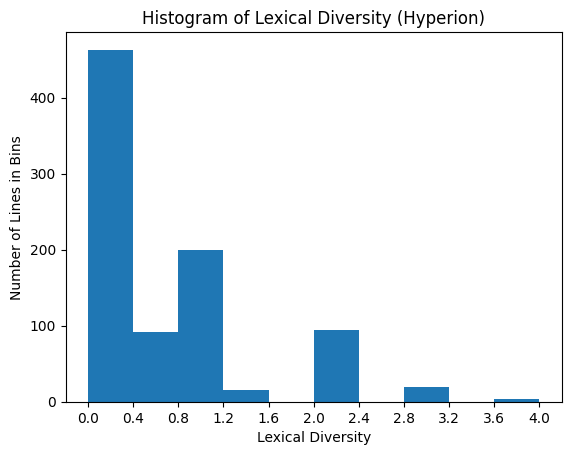

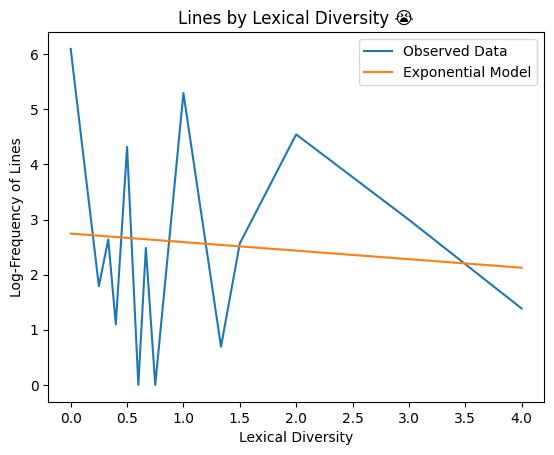

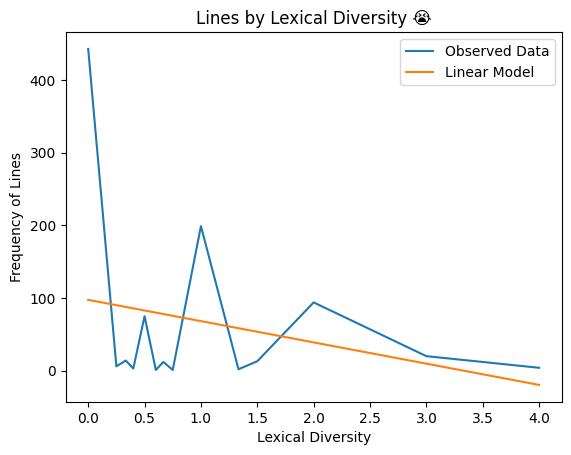

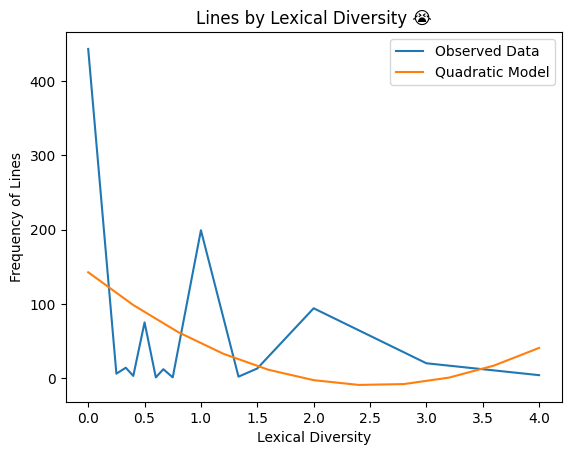

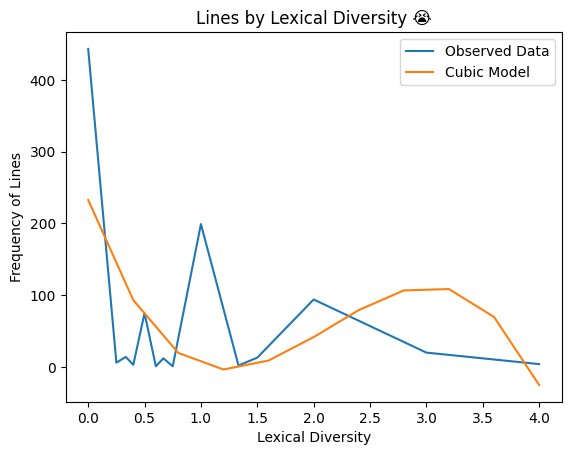

<Figure size 640x480 with 0 Axes>

In [ ]:
#Pt 8
from matplotlib.ticker import PercentFormatter

plt.xticks(np.arange(0, 4.4, step=0.4))
plt.hist(raw_ratios)
plt.title("Histogram of Lexical Diversity (Hyperion)")
plt.xlabel("Lexical Diversity")
plt.ylabel("Number of Lines in Bins")
plt.show()
plt.clf()

bin_map = {}
for r in raw_ratios:
  bin_map[r]=bin_map.get(r,0)+1

tmp = sorted(bin_map.items(),key=lambda a:a[0])

X = list(map(lambda a:a[0],tmp))
y = list(map(lambda a:a[1],tmp))

ylog = list(map(log,y))

#polynomial and exponential curves don't fit. no clear parametric fitting available.
#all tested models are 🤮
zlog = np.poly1d(np.polyfit(X,ylog,1))
z1 = np.poly1d(np.polyfit(X,y,1))
z2 = np.poly1d(np.polyfit(X,y,2))
z3 = np.poly1d(np.polyfit(X,y,3))
def z_(x,coeffs):
  v = 0
  for i in range(len(coeffs)):
    v += coeffs[i]*x**i
  return v
z__ = ["Exponential","Linear","Quadratic","Cubic"]
for i_, z in enumerate([zlog,z1,z2,z3]):
  curve = []
  curve2 = []
  for i in range(11):
    curve += [z_(i*0.4,z.coefficients[::-1])]
    curve2 += [i*0.4]
  plt.plot(X,y if z!= zlog else ylog,label="Observed Data")
  plt.plot(curve2,curve,label="%s Model"%z__[i_])
  plt.xlabel("Lexical Diversity")
  plt.ylabel("%sFrequency of Lines"%("Log-" if z==zlog else ""))
  plt.title("Lines by Lexical Diversity 😭")
  plt.legend()
  plt.show()
  plt.clf()

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

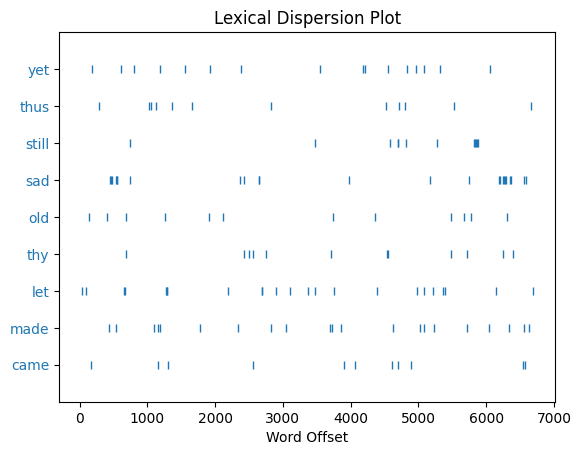

In [ ]:
#Pt 9
from nltk.text import Text
from nltk.draw.dispersion import dispersion_plot

#dispersion
v_freq = {}
adj_freq = {}
adv_freq = {}
clean = []
for l in poem_lines:

  tmp = nltk.pos_tag(l,tagset="universal")
  for t in tmp:
    clean += [t[0]]
    if t[0] in stops:
      continue
    if t[1]=="VERB":
      v_freq[t[0]] = v_freq.get(t[0],0)+1
    if t[1]=="ADJ":
      adj_freq[t[0]] = adj_freq.get(t[0],0)+1
    if t[1]=="ADV":
      adv_freq[t[0]] = adv_freq.get(t[0],0)+1

lv = list(map(lambda a:a[0],sorted(v_freq.items(),key=lambda a:a[1],reverse=True)[:3]))
la = list(map(lambda a:a[0],sorted(adj_freq.items(),key=lambda a:a[1],reverse=True)[:3]))
lj = list(map(lambda a:a[0],sorted(adv_freq.items(),key=lambda a:a[1],reverse=True)[:3]))

clean_text = Text(clean)
dispersion_plot(clean_text, lv+la+lj, ignore_case=True, title='Lexical Dispersion Plot')



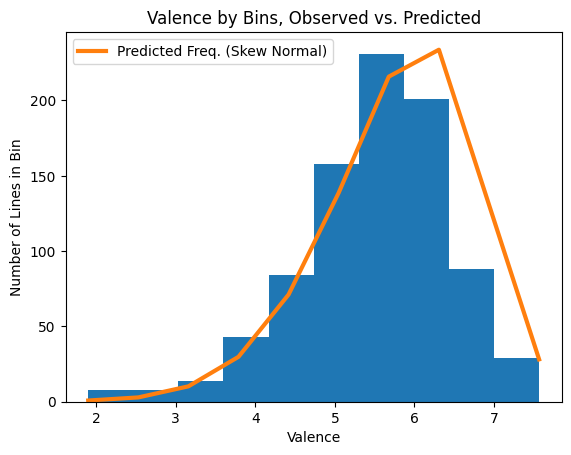

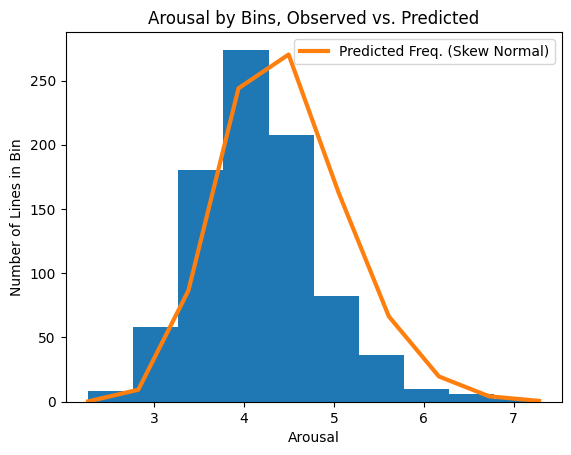

In [ ]:
#Pt 10
from scipy import stats

vader = pd.read_csv("https://gitlab.com/jcoles/nlp-final-project/-/raw/main/vader.csv",sep=";")

vader_ = vader.dropna(subset=["Valence","Arousal"])

valence = vader_["Valence"]
arousal = vader_["Arousal"]

plt.hist(valence)
ae, loce, scalee = stats.skewnorm.fit(valence)
bruh = np.array([0]+np.linspace(min(valence),max(valence),10).tolist())
bruh2 = stats.skewnorm.cdf(bruh,ae, loce, scalee)
plt.plot(bruh[1:],[len(valence)*(bruh2[i]-bruh2[i-1]) for i in range(1,len(bruh2))],label="Predicted Freq. (Skew Normal)",linewidth=3)
plt.xlabel("Valence")
plt.ylabel("Number of Lines in Bin")
plt.title("Valence by Bins, Observed vs. Predicted")
plt.legend()
plt.show()
plt.clf()
plt.hist(arousal)
ae, loce, scalee = stats.skewnorm.fit(arousal)
bruh = np.array([0]+np.linspace(min(arousal),max(arousal),10).tolist())
bruh2 = stats.skewnorm.cdf(bruh,ae, loce, scalee)
plt.plot(bruh[1:],[len(arousal)*(bruh2[i]-bruh2[i-1]) for i in range(1,len(bruh2))],label="Predicted Freq. (Skew Normal)",linewidth=3)
plt.xlabel("Arousal")
plt.ylabel("Number of Lines in Bin")
plt.title("Arousal by Bins, Observed vs. Predicted")
plt.legend()


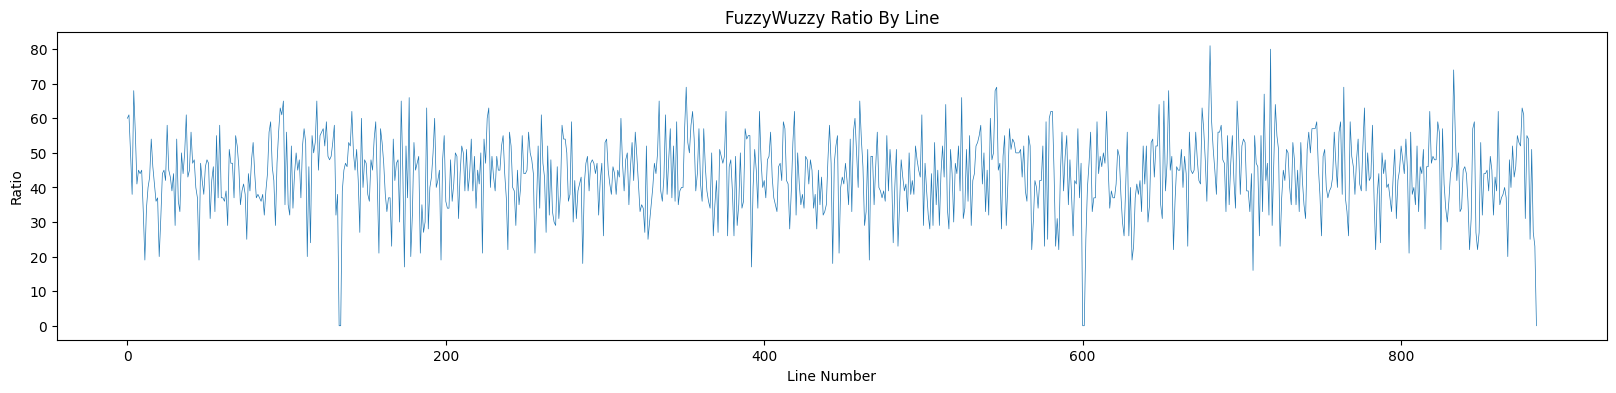

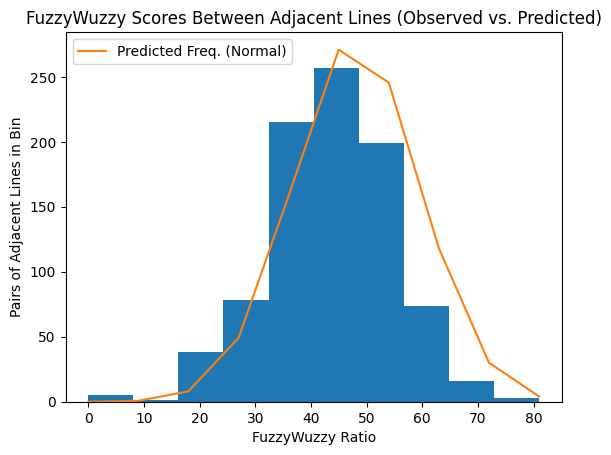

In [ ]:
#Pt 11
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
raw_fuzz = [fuzz.ratio(poem_lines[i-1],poem_lines[i]) for i in range(1,len(poem_lines))]
plt.figure(figsize=(20,4))
plt.plot(raw_fuzz,linewidth=0.5)
plt.title("FuzzyWuzzy Ratio By Line")
plt.xlabel("Line Number")
plt.ylabel("Ratio")
plt.show()
plt.clf()
plt.hist(raw_fuzz)

mu = np.mean(raw_fuzz)
sigma = np.var(raw_fuzz)
X =  np.array([0]+np.linspace(min(raw_fuzz),max(raw_fuzz),10).tolist())
bruh = stats.norm.cdf(X,mu,np.sqrt(sigma))
plt.plot(X[1:],[(len(raw_fuzz)-1)*(bruh[i]-bruh[i-1]) for i in range(1,len(X))],label="Predicted Freq. (Normal)")
plt.xlabel("FuzzyWuzzy Ratio")
plt.ylabel("Pairs of Adjacent Lines in Bin")
plt.title("FuzzyWuzzy Scores Between Adjacent Lines (Observed vs. Predicted)")
plt.legend()